In [14]:
import os
print(os.getcwd())

C:\Users\nette\Dateistruktur\RWTH\Auslandssemester\ImSemester\CS-401 Applied Data Analysis\Project\P3\the-five-data-wranglers


In [15]:
%load_ext autoreload
%autoreload 2
from config import df_ba_ratings, df_rb_ratings
from src.models.seasonality_analysis import *
from src.models.foreign_beer import *
from src.models.experience_words import *
from src.data.some_dataloader import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
plot_beer_style_ranking_by_amount(df_rb_ratings, df_rb_ratings['style'].unique(),  300, 14)

We lost 0 rows by filtering out styles with less than 14 reviews.


# Generaing the plots for the experience_words analysis

### Combined plot with distribution and rating differences

In [17]:
exp_user_ids_ba = get_experienced_users2(df_ba_ratings, exp_words1)
df_ba_ratings_of_exp, df_ba_ratings_of_inexp = split_by_experience(df_ba_ratings, exp_user_ids_ba)

In [18]:
# printing some interesting statistics
print("Number of experienced users: ", len(exp_user_ids_ba))
print("Number of ratings by experienced users: ", len(df_ba_ratings_of_exp))
print("Average rating by experienced users: ", round(df_ba_ratings_of_exp["rating"].mean(), 2))
print("\nNumber of inexperienced users: ", len(df_rb_ratings["user_id"].unique()) - len(exp_user_ids_ba))
print("Number of ratings by inexperienced users: ", len(df_ba_ratings_of_inexp))
print("Average rating by inexperienced users: ", round(df_ba_ratings_of_inexp["rating"].mean(), 2))

Number of experienced users:  3959
Number of ratings by experienced users:  2555996
Average rating by experienced users:  3.82

Number of inexperienced users:  58293
Number of ratings by inexperienced users:  5837036
Average rating by inexperienced users:  3.91


In [19]:
# creating a plot for these statistics so that they can be presented nicely on the website


Plot saved as plot.html


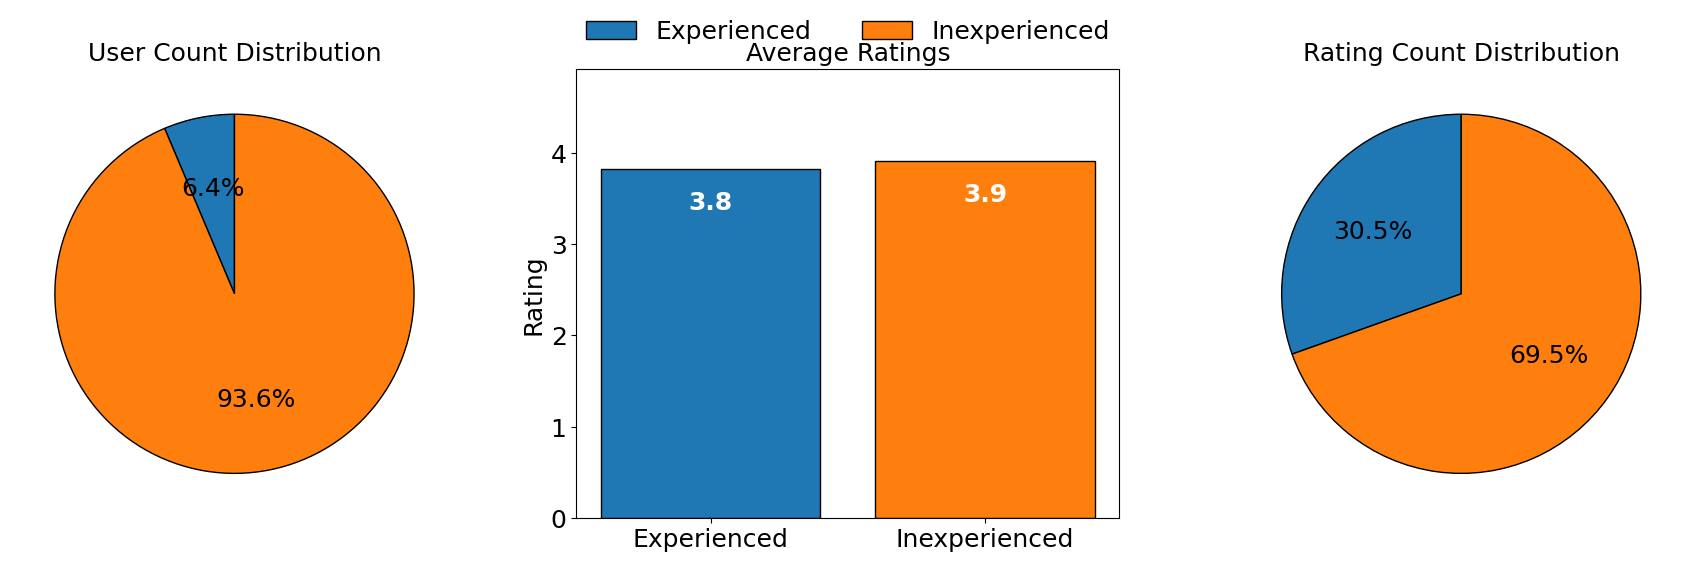

In [20]:
plot_user_data(len(exp_user_ids_ba), len(df_rb_ratings["user_id"].unique()) - len(exp_user_ids_ba), len(df_ba_ratings_of_exp), len(df_ba_ratings_of_inexp), round(df_ba_ratings_of_exp["rating"].mean(), 2), round(df_ba_ratings_of_inexp["rating"].mean(), 2), mode="save")

In [21]:
plot_df, most_rated = calculate_style_distribution(df_ba_ratings_of_exp, df_ba_ratings_of_inexp)

In [22]:
rating_diff_df = calculate_rating_difference(df_ba_ratings_of_exp, df_ba_ratings_of_inexp, most_rated)

In [23]:
rating_diff_df2, distr_diff_df = calculate_rating_difference_with_ci(df_ba_ratings_of_exp, df_ba_ratings_of_inexp, most_rated)

In [24]:
save_plot_combined_distribution_and_rating_difference_with_ci(plot_df, rating_diff_df2, distr_diff_df)

### US map plot

In [25]:
df_ba_users, df_rb_users = load_user_data()

In [26]:
df_brew = load_brewery_data(brewery_path="src/data/RateBeer/breweries.csv")

In [27]:
df_ba_ratings_wo_text = load_rating_wo_text("src/data/BeerAdvocate/BA_ratings.csv")

df_ba_ratings_w_text = df_ba_ratings
df_rb_ratings_w_text = df_rb_ratings

In [28]:
df_rb_users_ratings_us_only, df_ba_users_ratings_us_only = prepare_datasets(df_rb_users, df_ba_users, df_rb_ratings_w_text, df_ba_ratings_w_text)

Number of ratings from US from BeerAdvocate: 7303870
Number of ratings from US from RateBeer: 352157


In [29]:
# there are some duplicates in the two datasets
df_rb_users_ratings_us_only = filter_usa_duplicates(df_rb_users_ratings_us_only, df_ba_users_ratings_us_only, ["style", "brewery_name", "abv", "text"])

Number of duplicates:  317982


In [30]:
df_rb_users_ratings_us_only = df_rb_users_ratings_us_only.drop(columns=["text"])
df_ba_users_ratings_us_only = df_ba_users_ratings_us_only.drop(columns=["text"])

In [31]:
df_ba_brew = load_brewery_data(brewery_path="src/data/BeerAdvocate/breweries.csv")

In [32]:
df_us_only = merge_with_brewery(df_rb_users_ratings_us_only, df_ba_users_ratings_us_only, df_brew, df_ba_brew)

Number of ratings from US: 7332710


In [33]:
df_us_only = avg_ratings_us(df_us_only)

Avg rating for US beer: 3.9113082983029344
Avg rating for non-US beer: 3.800977039382433


In [34]:
avg_ratings_per_location = avg_ratings_per_location_us(df_us_only)

In [35]:
plot_avg_ratings_map(avg_ratings_per_location, False, True)

is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3.959702    0.154107
is_us_beer State     False      True  Rating Difference
0             AL  3.749917  3.840242           0.090325
1             AK  3.906063  3.948660           0.042597
2             AZ  3.777696  3.927382           0.149686
3             AR  3.783181  3.864941           0.081760
4             CA  3.805595  3.959702           0.154107


In [36]:
plot_avg_ratings_map(avg_ratings_per_location, True, True)

is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3.959702    0.154107
is_us_beer State     False      True  Rating Difference
0             AL  3.749917  3.840242           0.090325
1             AK  3.906063  3.948660           0.042597
2             AZ  3.777696  3.927382           0.149686
3             AR  3.783181  3.864941           0.081760
4             CA  3.805595  3.959702           0.154107


In [37]:
def plot_avg_ratings_map_testing(avg_ratings_per_location, large_map=True, save=True):
    """
    Plots an interactive map of the USA showing the difference in average ratings by state.
    The color intensity reflects the difference value, and hovering over a state displays its name and value.

    :param large_map: whether we want to give the map more space in the iframe as default
    :param save: whether we want to save or show the graphic
    :param avg_ratings_per_location: DataFrame containing states and the difference in ratings.
    :return: Nothing (plots an interactive map).
    """
    # Reset index to ensure "user_location" is a column
    avg_ratings_per_location = avg_ratings_per_location.reset_index()

    print(avg_ratings_per_location.head())

    # ensure the column names are meaningful for the map
    avg_ratings_per_location.rename(
        columns={"user_location": "State", "Difference": "Rating Difference"},
        inplace=True,
    )

    avg_ratings_per_location["State"] = avg_ratings_per_location["State"].map(
        state_name_to_abbreviation
    )

    print(avg_ratings_per_location.head())

    # Use Plotly Express to create the map
    fig = px.choropleth(
        avg_ratings_per_location,
        locations="State",  # state names in the data
        locationmode="USA-states",  # match state names to the USA map
        color="Rating Difference",  # value to represent via color
        color_continuous_scale="Viridis",  # color scale
        scope="usa",  # restrict to USA
        title="Difference in Average Ratings by State (US Beer vs Non-US Beer)",
        labels={"Rating Difference": "Diff (US - Non-US)"},  # label for hover tooltip
    )

    # customize hover data
    fig.update_traces(hovertemplate="<b>%{location}</b><br>Difference: %{z:.2f}")

    # giving the map more space in the iframe
    if large_map:
        fig.update_layout(
            width=550,  # increase width of the map in the iframe
            height=700,  # increase height of the map in the iframe
            title=dict(
                #x=0.5,  # Center the title
                font=dict(size=18)  # Adjust title font size
            ),
            margin={"r": 0, "t": 0, "l": 0, "b": 0},  # Reduce margins around the plot
            coloraxis_colorbar=dict(
                title="Difference",
                thicknessmode="pixels",  # Adjust thickness of colorbar
                thickness=15,  # Set thickness in pixels
                lenmode="fraction",  # Adjust length of colorbar
                len=0.5,  # Set the length relative to the figure
                #xanchor="right",  # Align the colorbar to the right
                #x=0.9  # Set its horizontal position
            )
        )

    # Show the plot
    if save:
        if large_map:
            fig.write_html("src/plots/US_map2.html")  # different file name, so I am able to compare...
            return
        fig.write_html("src/plots/US_map.html")
    else:
        fig.show()


### World map plot

In [38]:
df_ba_users, df_rb_users = load_user_data()
df_rb_sum_rat = calculate_ratings_by_location(df_rb_users)
df_rb_sum_rat_foreign = accumulate_us(df_rb_sum_rat)
df_rb_sum_rat_cutoff = cutoff_and_sort(df_rb_sum_rat_foreign)

In [39]:
df_rb_ratings_wo_text = load_rating_wo_text("src/data/RateBeer/RB_ratings.csv")

df_rb_users_us = accumulate_us2(df_rb_users, "location")
df_rb_users_ratings = merge_users_and_ratings(df_rb_ratings_wo_text, df_rb_users_us)
df_rb_users_ratings_top50, top50 = filter_top_countries(df_rb_users_ratings, top_n=50)

df_plot = avg_rating_by_location(df_rb_users_ratings_top50)

In [40]:
plot_mean_rating_by_location(df_plot)

In [41]:
plot_bar_chart(df_plot)

In [42]:
plot_choropleth_map(df_plot)